<a href="https://colab.research.google.com/github/ASG-0520/pandas_cheatsheet_ipynb/blob/main/pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PANDAS
---

## Series
Если индекс явно не задан, то pandas автоматически создаёт RangeIndex от 0 до N-1, где N общее количество элементов. 

In [1]:
import pandas as pd
my_series = pd.Series(['a', 'b', 'c', 'd', 'e'])
print(my_series)


0    a
1    b
2    c
3    d
4    e
dtype: object


---
#### У объекта Series есть атрибуты через которые можно получить список элементов и индексы, это values и index соответственно.

In [2]:
my_series.index


RangeIndex(start=0, stop=5, step=1)

In [3]:
my_series.values

array(['a', 'b', 'c', 'd', 'e'], dtype=object)

In [4]:
my_series[2]

'c'

---
#### Индексы можно задавать явно:

In [5]:
my_series2 = pd.Series([1, 2, 3, 4, 5], index = ['одын', "два", "тры", "четырэ", "пят"])
my_series2

одын      1
два       2
тры       3
четырэ    4
пят       5
dtype: int64

In [6]:
my_series2['два']

2

---
#### Делать выборку по нескольким индексам и осуществлять групповое присваивание:

In [7]:
my_series2[['одын', "два"]]

одын    1
два     2
dtype: int64

In [8]:
my_series2[['одын', "два"]] = 0
my_series2

одын      0
два       0
тры       3
четырэ    4
пят       5
dtype: int64

---
#### Фильтровать Series как душе заблагорассудится, а также применять математические операции и многое другое:

In [9]:
my_series2[my_series2 > 0]

тры       3
четырэ    4
пят       5
dtype: int64

In [10]:
my_series2[my_series2 > 0] * 2

тры        6
четырэ     8
пят       10
dtype: int64

---
#### Если Series напоминает нам словарь, где ключом является индекс, а значением сам элемент, то можно сделать так:

In [11]:
my_series3 = pd.Series({"a":1,"b":2, "c":3})
my_series3

a    1
b    2
c    3
dtype: int64

In [12]:
"a" in my_series3

True

---
#### У объекта Series и его индекса есть атрибут name, задающий имя объекту и индексу соответственно.

In [13]:
my_series3.name = 'numbers'  # название Series (столбца)
my_series3.index.name = 'X'  # название столбца индексов
my_series3

X
a    1
b    2
c    3
Name: numbers, dtype: int64

---
#### Индекс можно поменять "на лету", присвоив список атрибуту index объекта Series

In [14]:
my_series3.index = ['az','za','zaaa']
my_series3

az      1
za      2
zaaa    3
Name: numbers, dtype: int64

Имейте в виду, что список с индексами по длине должен совпадать с количеством элементов в Series.

## DataFrame

Объект DataFrame лучше всего представлять себе в виде обычной таблицы и это правильно, ведь DataFrame является табличной структурой данных. В любой таблице всегда присутствуют строки и столбцы. Столбцами в объекте DataFrame выступают объекты Series, строки которых являются их непосредственными элементами.

---
#### DataFrame проще всего сконструировать на примере питоновского словаря:

In [15]:
df = pd.DataFrame({
    'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
    'population': [17.04, 143.5, 9.5, 45.5],
    'square': [2724902, 17125191, 207600, 603628]
    })
df

,country,population,square
0,Kazakhstan,17.04,2724902
1,Russia,143.50,17125191
2,Belarus,9.50,207600
3,Ukraine,45.50,603628


In [16]:
df['country']

0    Kazakhstan
1        Russia
2       Belarus
3       Ukraine
Name: country, dtype: object

In [17]:
df['country'][1]

'Russia'

---
#### Объект DataFrame имеет 2 индекса: по строкам и по столбцам. Если индекс по строкам явно не задан (например, колонка по которой нужно их строить), то pandas задаёт целочисленный индекс RangeIndex от 0 до N-1, где N это количество строк в таблице.

In [18]:
df.columns

Index(['country', 'population', 'square'], dtype='object')

In [19]:
df.index

RangeIndex(start=0, stop=4, step=1)

## Доступ по индексу в DataFrame

#### Индекс по строкам можно задать разными способами, например, при формировании самого объекта DataFrame или "на лету":

In [20]:
df = pd.DataFrame(
    {
        'country': ['Kazakhstan', 'Russia', 'Belarus', 'Ukraine'],
        'population': [17.04, 143.5, 9.5, 45.5],
        'square': [2724902, 17125191, 207600, 603628]
    }, index = ['KZ', 'RU', 'BY', 'UA']
)
df.index.name = "Country code"
df

,country,population,square
Country code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


Как видно, индексу было задано имя - Country Code. Отмечу, что объекты Series из DataFrame будут иметь те же индексы, что и объект DataFrame:

In [21]:
df['country']

Country code
KZ    Kazakhstan
RU        Russia
BY       Belarus
UA       Ukraine
Name: country, dtype: object

---
#### Доступ к строкам по индексу возможен несколькими способами (.loc / .iloc):

> .loc - используется для доступа по строковой метке <br>
> .iloc - используется для доступа по числовому значению (начиная от 0)


In [22]:
df.loc['RU']

country         Russia
population       143.5
square        17125191
Name: RU, dtype: object

In [23]:
df.iloc[2]

country       Belarus
population        9.5
square         207600
Name: BY, dtype: object

---
#### Можно делать выборку по индексу и интересующим колонкам:

In [24]:
df.loc[['KZ', 'RU'], 'square']

Country code
KZ     2724902
RU    17125191
Name: square, dtype: int64

---
#### Как можно заметить, .loc в квадратных скобках принимает 2 аргумента: интересующий индекс, в том числе поддерживается слайсинг и колонки.

In [25]:
df.loc['KZ':'BY', :]

,country,population,square
Country code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600


---
#### Фильтровать DataFrame с помощью т.н. булевых массивов:

In [26]:
df[df.population > 10][['country', 'square']]

,country,square
Country code,,
KZ,Kazakhstan,2724902
RU,Russia,17125191
UA,Ukraine,603628


---
#### К столбцам можно обращаться, используя атрибут или нотацию словарей Python, т.е. df.population и df['population'] это одно и то же.

In [27]:
df[df['population'] > 10]

,country,population,square
Country code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
UA,Ukraine,45.50,603628


---
#### Сбросить индексы

In [28]:
df.reset_index()

,Country code,country,population,square
0,KZ,Kazakhstan,17.04,2724902
1,RU,Russia,143.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


In [29]:
df

,country,population,square
Country code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


---
#### Добавим новый столбец, в котором население (в миллионах) поделим на площадь страны, получив тем самым плотность:

In [30]:
#df.density = df.population /df.square * 1000000
# или
df['density'] = df['population'] /df['square'] * 1000000

df

,country,population,square,density
Country code,,,,
KZ,Kazakhstan,17.04,2724902,6.253436
RU,Russia,143.50,17125191,8.379469
BY,Belarus,9.50,207600,45.761079
UA,Ukraine,45.50,603628,75.377550


---
#### Не нравится новый столбец? Не проблема, удалим его:

In [31]:
# df.drop(['density'], axis='columns')

#### или через `del df['density']`

In [32]:
del df['density']

---
#### Переименовывать столбцы нужно через метод rename:

> В этом примере перед тем как переименовать столбец Country Code, убедитесь, что с него сброшен индекс, иначе не будет никакого эффекта.

In [33]:
df.reset_index()
df.rename(columns={'Country code': 'country_code'}, inplace=True)
df

,country,population,square
Country code,,,
KZ,Kazakhstan,17.04,2724902
RU,Russia,143.50,17125191
BY,Belarus,9.50,207600
UA,Ukraine,45.50,603628


---
## Чтение и запись данных
pandas поддерживает все самые популярные форматы хранения данных: csv, excel, sql, буфер обмена, html и многое другое:

---
#### Чаще всего приходится работать с csv-файлами. Например, чтобы сохранить наш DataFrame со странами, достаточно написать:

In [34]:
df.to_csv('df.csv')

Функции to_csv ещё передаются различные аргументы (например, символ разделителя между колонками) о которых подробнее можно узнать в официальной документации.

---
#### Считать данные из csv-файла и превратить в DataFrame можно функцией read_csv.

In [35]:
df = pd.read_csv('df.csv', sep=',')
df

,Country code,country,population,square
0,KZ,Kazakhstan,17.04,2724902
1,RU,Russia,143.50,17125191
2,BY,Belarus,9.50,207600
3,UA,Ukraine,45.50,603628


Аргумент sep указывает разделитесь столбцов. Существует ещё масса способов сформировать DataFrame из различных источников, но наиболее часто используют CSV, Excel и SQL. Например, с помощью функции read_sql, pandas может выполнить SQL запрос и на основе ответа от базы данных сформировать необходимый DataFrame. За более подробной информацией стоит обратиться к официальной документации.

---
## Группировка и агрегирование в pandas

Группировка данных один из самых часто используемых методов при анализе данных. В pandas за группировку отвечает метод .groupby. Я долго думал какой пример будет наиболее наглядным, чтобы продемонстрировать группировку, решил взять стандартный набор данных (dataset), использующийся во всех курсах про анализ данных — данные о пассажирах Титаника.

In [36]:
titanic_df = pd.read_csv("titanic.csv", sep=',')
titanic_df

,PassengerID,Name,PClass,Age,Sex,Survived,SexCode
0,1,"Allen, Miss Elisabeth Walton",1st,29.00,female,1,1
1,2,"Allison, Miss Helen Loraine",1st,2.00,female,0,1
2,3,"Allison, Mr Hudson Joshua Creighton",1st,30.00,male,0,0
3,4,"Allison, Mrs Hudson JC (Bessie Waldo Daniels)",1st,25.00,female,0,1
4,5,"Allison, Master Hudson Trevor",1st,0.92,male,1,0
...,...,...,...,...,...,...,...
1308,1309,"Zakarian, Mr Artun",3rd,27.00,male,0,0
1309,1310,"Zakarian, Mr Maprieder",3rd,26.00,male,0,0
1310,1311,"Zenni, Mr Philip",3rd,22.00,male,0,0
1311,1312,"Lievens, Mr Rene",3rd,24.00,male,0,0


---
#### Необходимо подсчитать, сколько женщин и мужчин выжило, а сколько нет. В этом нам поможет метод .groupby

In [37]:
titanic_df.groupby(['Sex', 'Survived'])['PassengerID'].count()

Sex     Survived
female  0           154
        1           308
male    0           709
        1           142
Name: PassengerID, dtype: int64

А теперь проанализируем в разрезе класса кабины:

In [38]:
titanic_df.groupby(['PClass', 'Survived'])['PassengerID'].count()

PClass  Survived
*       0             1
1st     0           129
        1           193
2nd     0           160
        1           119
3rd     0           573
        1           138
Name: PassengerID, dtype: int64

---
## Сводные таблицы в pandas

#### Термин "сводная таблица" хорошо известен тем, кто не по наслышке знаком с инструментом Microsoft Excel или любым иным, предназначенным для обработки и анализа данных. В pandas сводные таблицы строятся через метод .pivot_table. За основу возьмём всё тот же пример с Титаником. Например, перед нами стоит задача посчитать сколько всего женщин и мужчин было в конкретном классе корабля:

In [39]:
pvt = titanic_df.pivot_table(index=['Sex'], columns=['PClass'], values='Name', aggfunc='count')
pvt

PClass,*,1st,2nd,3rd
Sex,,,,
female,NaN,143.0,107.0,212.0
male,1.0,179.0,172.0,499.0


В качестве индекса теперь у нас будет пол человека, колонками станут значения из PClass, функцией агрегирования будет count (подсчёт количества записей) по колонке Name

In [40]:
pvt.loc['female',['1st', '2nd', '3rd']]

PClass
1st    143.0
2nd    107.0
3rd    212.0
Name: female, dtype: float64

---
## Анализ временных рядов

В pandas очень удобно анализировать временные ряды. В качестве показательного примера я буду использовать цену на акции корпорации Apple за 5 лет по дням.

In [41]:
apple_df = pd.read_csv('apple.csv', index_col='Date', parse_dates=True)
apple_df = apple_df.sort_index()
apple_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-02-23 to 2017-02-22
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [42]:
apple_df

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2012-02-23,515.079987,517.830009,509.499992,516.389977,142006900,66.903253
2012-02-24,519.669998,522.899979,518.640015,522.409981,103768000,67.683203
2012-02-27,521.309982,528.500000,516.280014,525.760017,136895500,68.117232
2012-02-28,527.960014,535.410011,525.850006,535.410011,150096800,69.367481
2012-02-29,541.560005,547.610023,535.700005,542.440025,238002800,70.278286
...,...,...,...,...,...,...
2017-02-15,135.520004,136.270004,134.619995,135.509995,35501600,135.509995
2017-02-16,135.669998,135.899994,134.839996,135.350006,22118000,135.350006
2017-02-17,135.100006,135.830002,135.100006,135.720001,22084500,135.720001


Здесь мы формируем DataFrame с DatetimeIndex по колонке Date и сортируем новый индекс в правильном порядке для работы с выборками. Если колонка имеет формат даты и времени отличный от ISO8601, то для правильного перевода строки в нужный тип, можно использовать метод [pandas.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html)

---
#### Давайте теперь узнаем среднюю цену акции (mean) на закрытии (Close):

In [43]:
apple_df.loc['2012-Feb', 'Close'].mean()

528.4820021999999

---
#### А если взять промежуток с февраля 2012 по февраль 2015 и посчитать среднее:

In [44]:
apple_df.loc['2012-Feb':'2015-Feb', 'Close'].mean()

430.43968317018414

---
#### А что если нам нужно узнать среднюю цену закрытия по неделям?!

In [45]:
apple_df.resample('w')['Close'].mean()

Date
2012-02-26    519.399979
2012-03-04    538.652008
2012-03-11    536.254004
2012-03-18    576.161993
2012-03-25    600.990001
                 ...    
2017-01-29    121.164000
2017-02-05    125.867999
2017-02-12    131.679996
2017-02-19    134.978000
2017-02-26    136.904999
Freq: W-SUN, Name: Close, Length: 262, dtype: float64

Resampling мощный инструмент при работе с временными рядами (time series), помогающий переформировать выборку так, как удобно вам. Метод resample первым аргументом принимает строку rule. Все доступные значения можно найти в [документации](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html).

---
## Визуализация данных в pandas

Для визуального анализа данных, pandas использует библиотеку matplotlib. Продемонстрирую простейший способ визуализации в pandas на примере с акциями Apple.

Берём цену закрытия в промежутке между 2012 и 2017.

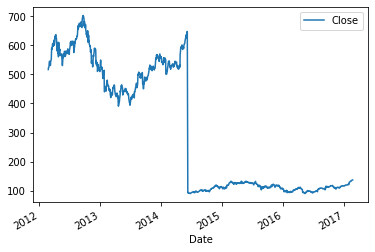

In [46]:
import matplotlib.pyplot as plt
new_sample_df = apple_df.loc['2012-Feb':'2017-Feb', ['Close']]
new_sample_df.plot()
plt.show()

По оси X, если не задано явно, всегда будет индекс. По оси Y в нашем случае цена закрытия. Если внимательно посмотреть, то в 2014 году цена на акцию резко упала, это событие было связано с тем, что Apple проводила сплит 7 к 1. Так мало кода и уже более-менее наглядный анализ ;)

---
---
> [Pandas cheatsheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf) <br>
> [Pandas документация](https://pandas.pydata.org/docs/index.html)

[источник](https://khashtamov.com/ru/pandas-introduction/)